# Setup and Imports

In [1]:
import os 

import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

import ipywidgets as widgets
from IPython.display import display
from ipywidgets import interactive_output

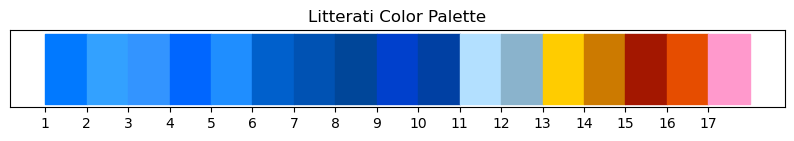

In [2]:
litterati_color = '#0179ff'
litterati_colors_8 = ["#0179ff", "#0060cc", "#1f8eff", "#0052b3", "#3394ff", "#6789cc", "#0066ff", "#33a1ff"]

litterati_colors = [
    "#0179ff",   # Base Color (Blue)
    "#33a1ff",   # Lighter and More Saturated Shade (Light Blue)
    "#3394ff",   # Lighter Shade (Light Blue)
    "#0066ff",   # Slightly Saturated Shade (Medium Blue)
    "#1f8eff",   # Slightly Lighter Shade (Medium Blue)
    "#0060cc",   # Slightly Darker Shade (Medium Blue)
    "#0052b3",   # Darker Shade (Dark Blue)
    "#004699",   # Even Darker Shade (Dark Blue)
    "#0040cc",   # Even Darker and Slightly Saturated Shade (Dark Blue)
    "#0040a3",   # Even Darker and Less Saturated Shade (Dark Blue)
    "#b3e0ff",   # Very Light Shade (Very Light Blue)
    "#8ab3cc",   # Light Shade with Reduced Saturation (Light Grayish Blue)
    "#ffcc00",   # Yellow Shade
    "#cc7a00",   # Dark Yellow Shade
    "#a31700",   # Reddish Shade
    "#e64d00",   # Orange Shade
    "#ff99cc"    # Light Pink Shade
]


# Create color bars
fig, ax = plt.subplots(figsize=(10, 1))
for i, color in enumerate(litterati_colors):
    ax.fill_between([i, i + 1], 0, 1, color=color)
ax.set_xticks(range(len(litterati_colors)))
ax.set_xticklabels(range(1, len(litterati_colors) + 1))
ax.set_yticks([])
ax.set_title("Litterati Color Palette")

# Show the color palette
plt.show()

# Load data

In [43]:
df = pd.read_csv("data/segments_counts_oct25_2023.csv")

segment_cols = {
    'segment_id': 'segment_id',
    'all_count': 'litter_count',
    'non_srl_count': 'count_nosrl',
    'food_count': 'count_food',
    'drink_count': 'count_drink',
    'wrapper_count': 'count_wrapper',
    'bottle_count': 'count_bottle',
    'can_count': 'count_can',
    'all_cups_count': 'count_all_cups', # new
    'fast_food_count': 'count_fastfood', # new
    'segment_distance': 'segment_length',
    'land_use': 'land_use',
    'Region': 'region',
    # 'imd_score': 'imd_score',
    'imd_decile': 'imd_decile',
    'imd_quintile': 'imd_quintile',
    'urban_rural': 'urban_rural_desc',
}

# ignored
# LSOA, Loc, Unique_ID, imd scores for (income, employment, etc)

df = df[segment_cols.keys()].rename(columns=segment_cols, errors='ignore')

In [44]:
# Update object type for IMD Quintiles
df['imd_quintile'] = df.imd_quintile.astype(str)
df['imd_decile'] = df.imd_decile.astype(str)

In [45]:
df.columns

Index(['segment_id', 'litter_count', 'count_nosrl', 'count_food',
       'count_drink', 'count_wrapper', 'count_bottle', 'count_can',
       'count_all_cups', 'count_fastfood', 'segment_length', 'land_use',
       'region', 'imd_decile', 'imd_quintile', 'urban_rural_desc'],
      dtype='object')

In [46]:
df.head(1).T

,0
segment_id,22222
litter_count,14
count_nosrl,14
count_food,6
count_drink,2
count_wrapper,5
count_bottle,1
count_can,0
count_all_cups,1
count_fastfood,1


In [47]:
display_map = {
 'segment_id': 'Segment ID',
 'litter_count': 'Total Litter',
 'count_nosrl': 'Non Smoking Related Litter',
 'count_food': 'Food Litter',
 'count_fastfood': 'Fast Food Litter', 
 'count_drink': 'Drink Litter',
 'count_wrapper': 'Wrappers',
 'count_bottle': 'Bottles',
 'count_can': 'Cans',
 'count_bottles_and_cans': 'Bottles and Cans',
 'count_all_cups': 'All cups',
 'segment_length': 'Segment Length',
 'land_use': 'Land Use Type',
 'region': 'Region of England',
 'imd_score': 'IMD Score',
 'imd_decile': 'IMD Decile',
 'imd_quintile': 'IMD Quintile',
 'imd_decile': 'IMD Decile',
 'urban_rural': 'Urban vs Rural',
 'urban_rural_desc': 'Urban / Rural description',
 'urban_rural_class': 'Urban / Rural class',
}

## Sanity checks

In [48]:
len(df) 

5922

In [49]:
# Total length in Meters, distance surveyed
df.segment_length.sum()

343889.69999999995

In [50]:
## No litter? 

print(sum(df.count_nosrl == 0))

print(sum(df.litter_count == 0))


250
0


In [51]:
## zero-sized segments

sum(df['segment_length'] == 0)

0

In [52]:
## very long segments

sum(df['segment_length'] > 500)
df[df['segment_length'] > 500].T

,206,914,4417,4418,4419
segment_id,23581,24886,33269,33270,33271
litter_count,2,84,214,753,184
count_nosrl,0,64,175,636,139
count_food,0,26,59,176,39
count_drink,0,5,80,279,30
count_wrapper,0,13,53,148,33
count_bottle,0,0,11,56,8
count_can,0,1,58,141,6
count_all_cups,0,0,2,11,2
count_fastfood,0,0,1,0,0


In [53]:
sum(df.segment_length.isna())

0

In [54]:
mask = df.segment_length > 100
mask.sum()

5


## Preprocessing steps

In [55]:
# Derive simplified Urban/Rural classification from the corresponding descriptive column

def set_urban_rural_class(desc): 
    """Utility"""
    if 'urban' in desc.lower(): 
        return 'urban'
    else:
        return 'rural'

# create new column 
df['urban_rural_class'] = df.urban_rural_desc.apply(set_urban_rural_class)

In [56]:
# add a new count combining bottles and cans
df['count_bottles_and_cans'] = (df['count_bottle'] + df['count_can'])


In [57]:
# Fill NaN values in 'segment_distance' with zeros
df['segment_length'].fillna(50, inplace=True)
sum(df.segment_length.isna())

0

In [58]:
# Set all segments between 100 m and 500m to 100m 
mask = (df.segment_length > 100) & (df.segment_length < 500)
df.loc[mask, 'segment_length'] = 100

# check
mask = (df.segment_length > 100) & (df.segment_length < 500)
print(mask.sum())

0


# Litter Per Meter (LPM)

## Definition 
This metric, LPM, estimates the amount of litter per meter. 

To compute LPM for a given segment, we can count the number of pieces of litter in that segment and divide by the length of the segment in meters. 


In [59]:
def compute_lpm(df, group_column, count_column):
    """Compute LPM for a groupby operation"""
    # Group by the specified column and calculate the sum of the count_column and segment_length
    grouped = df.groupby(group_column).agg({count_column: 'sum', 'segment_length': 'sum'})

    # Calculate LPM for each group
    grouped['LPM'] = grouped[count_column] / grouped['segment_length']

    # Reset the index to have a new DataFrame with the group_column as a regular column
    grouped.reset_index(inplace=True)

    return grouped

# plot LPM
def plot_lpm(lpmdf, group_column, count_column):
    
    # sort
    lpmdf = lpmdf.sort_values(by='LPM', ascending=True)
    
    # Create a bar chart
    title = f'LPM for "{display_map[count_column]}" by {display_map[group_column]}'
    fig = px.bar(lpmdf, x='LPM', y=group_column, 
                 # text=count_column, 
                 title=title,
                 width=1000, height=600, 
                 color_discrete_sequence=litterati_colors)

    # Customize the chart appearance
    # to show values next to bar chart: 
    fig.update_traces(
        text=None,
        # texttemplate='%{text}', textposition='outside'
    )
    
    fig.update_layout(
        xaxis_title='LPM (Litter per Meter)', 
        yaxis_title=display_map[group_column])

    return fig

# Manual usage - disabled
# group_column = 'region'
# count_column = 'count_nosrl'

In [60]:
df.columns

Index(['segment_id', 'litter_count', 'count_nosrl', 'count_food',
       'count_drink', 'count_wrapper', 'count_bottle', 'count_can',
       'count_all_cups', 'count_fastfood', 'segment_length', 'land_use',
       'region', 'imd_decile', 'imd_quintile', 'urban_rural_desc',
       'urban_rural_class', 'count_bottles_and_cans'],
      dtype='object')

In [64]:
count_cols

['litter_count',
 'count_nosrl',
 'count_food',
 'count_drink',
 'count_wrapper',
 'count_bottle',
 'count_can',
 'count_all_cups',
 'count_fastfood',
 'count_bottles_and_cans']

In [145]:
# Create dropdown widgets for selecting group_column and count_column

group_cols = ['region', 'urban_rural_class', 'land_use', 'imd_quintile', 'imd_decile', 'urban_rural_desc']

# group columns selection
group_column_selector = widgets.Dropdown(
    options=[display_map[c] for c in group_cols],
    value='Region of England',
    description='Select Group Column:'
)

# Adjust the style of the dropdown to give more width to the description
group_column_selector.style.description_width = 'initial'
group_column_selector.layout.width = '50%'  # Set the width of the dropdown

# count columns selection
# Auto: count_cols = ['litter_count'] + [c for c in df.columns if c.startswith('count')]
# Manual, in order to set desired order: 
count_cols = ['litter_count', 'count_nosrl', 'count_food', 'count_drink', 'count_fastfood', 
              'count_all_cups', 'count_wrapper', 'count_bottles_and_cans', 'count_bottle', 'count_can']

count_column_selector = widgets.Dropdown(
    options=[display_map[c] for c in count_cols],
    value='Non Smoking Related Litter',
    description='Select Count Column:'
)

# Adjust the style of the dropdown to give more width to the description
count_column_selector.style.description_width = 'initial'
count_column_selector.layout.width = '50%'  # Set the width of the dropdown

# Create a function that updates the plot based on dropdown values
def update_plot(group_column, count_column):
    # Reverse lookup from the display_map to get the actual column names
    group_column = [k for k, v in display_map.items() if v == group_column][0]
    count_column = [k for k, v in display_map.items() if v == count_column][0]
    
    lpm_group_df = compute_lpm(df, group_column, count_column)
    fig = plot_lpm(lpm_group_df, group_column, count_column)

    fig.show()

# Use interactive_output to link the function and the dropdowns
output = interactive_output(update_plot, {'group_column': group_column_selector, 'count_column': count_column_selector})

# Display the dropdown widgets
display(group_column_selector, count_column_selector, output)


Dropdown(description='Select Group Column:', layout=Layout(width='50%'), options=('Region of England', 'Urban …

Dropdown(description='Select Count Column:', index=1, layout=Layout(width='50%'), options=('Total Litter', 'No…

Output()

In [68]:
df.head().to_csv()

',segment_id,litter_count,count_nosrl,count_food,count_drink,count_wrapper,count_bottle,count_can,count_all_cups,count_fastfood,segment_length,land_use,region,imd_decile,imd_quintile,urban_rural_desc,urban_rural_class,count_bottles_and_cans\n0,22222,14,14,6,2,5,1,0,1,1,17.8,Rural roads,South East (England),2,1,Rural village and dispersed,rural,1\n1,22224,6,5,1,0,1,0,0,0,0,10.8,Rural roads,South East (England),2,1,Rural village and dispersed,rural,0\n2,22226,8,7,0,5,0,1,4,0,0,11.0,Rural roads,South East (England),2,1,Rural village and dispersed,rural,5\n3,22228,3,2,0,1,0,0,0,0,0,20.4,Rural roads,South East (England),2,1,Rural village and dispersed,rural,0\n4,22229,1,1,0,0,0,0,0,0,0,12.0,Rural roads,South East (England),2,1,Rural village and dispersed,rural,0\n'

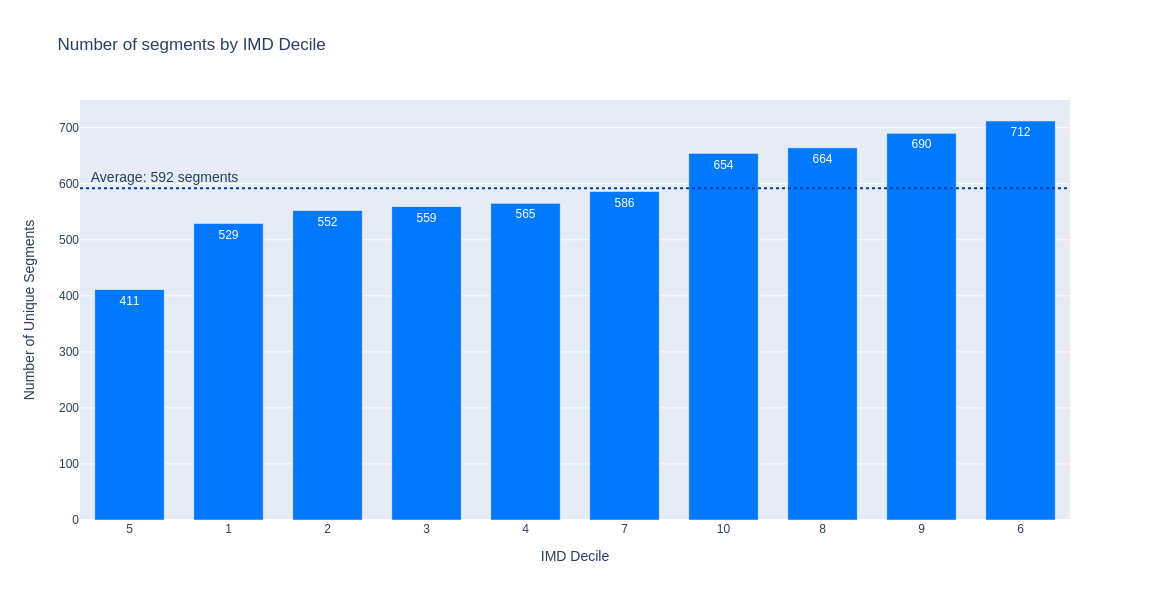

In [124]:
# Group by imd and count the number of unique segments in each group
result = df.groupby("imd_decile")["segment_id"].nunique().reset_index()

# Calculate the average count
average_count = result["segment_id"].mean()

# Create the same plot using Plotly
fig = px.bar(
    result, 
    x="imd_decile", y="segment_id", 
    text="segment_id", 
    title="Number of segments by IMD Decile",
    width=800, height=600,
)

fig.update_traces(marker_color=litterati_color, width=0.7)
fig.add_hline(
    y=average_count, 
    line_dash="dot", line_color=litterati_colors[9], line_width=2, 
    annotation_text= f'  Average: {average_count:.0f} segments',
    annotation_position="top left", annotation_font_size=14,
)
fig.update_xaxes(categoryorder="total ascending", title="IMD Decile")
fig.update_yaxes(title="Number of Unique Segments")

fig.show()


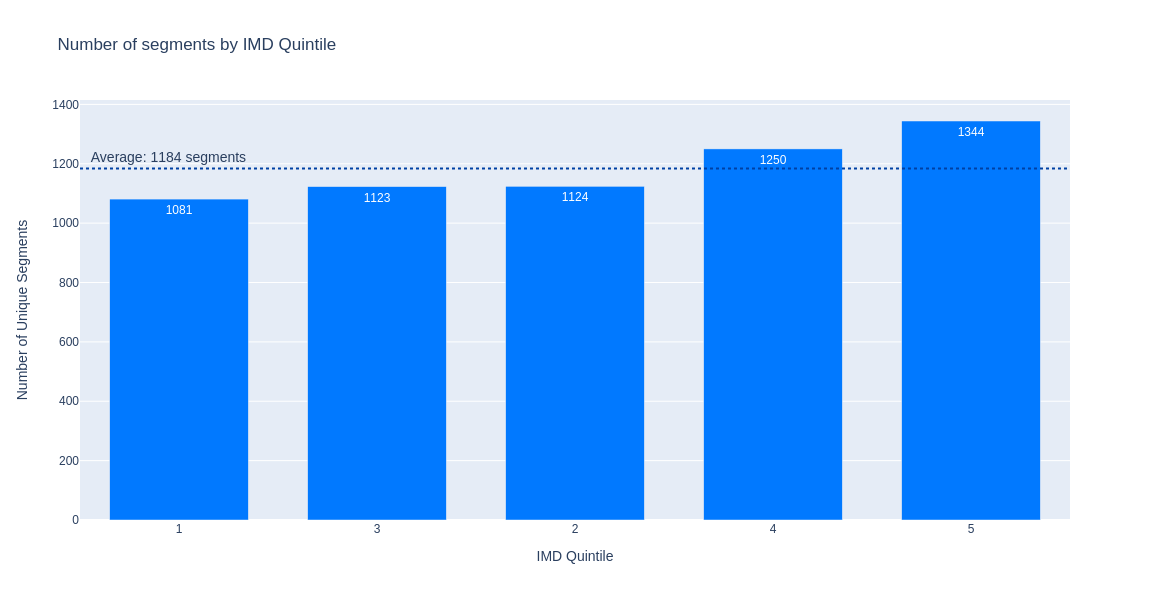

In [125]:

# Group by "imd_quintile" and count the number of unique segments in each group
result = df.groupby("imd_quintile")["segment_id"].nunique().reset_index()

# Calculate the average count
average_count = result["segment_id"].mean()

# Create the same plot using Plotly
fig = px.bar(
    result, 
    x="imd_quintile", y="segment_id", 
    text="segment_id", 
    title="Number of segments by IMD Quintile",
    width=800, height=600,
)

fig.update_traces(marker_color=litterati_color, width=0.7)
fig.add_hline(
    y=average_count, 
    line_dash="dot", line_color=litterati_colors[9], line_width=2, 
    annotation_text= f'  Average: {average_count:.0f} segments',
    annotation_position="top left", annotation_font_size=14,
)
fig.update_xaxes(categoryorder="total ascending", title="IMD Quintile")
fig.update_yaxes(title="Number of Unique Segments")

fig.show()


## Save to disc

In [128]:
# Define the output directory where you want to save the PNG files
output_directory = 'bar_charts'
os.makedirs(output_directory, exist_ok=True)

# Iterate through all combinations of group_column and count_column
for group_column in group_cols:
    for count_column in count_cols:
        # Create the LPM DataFrame
        lpm_group_df = compute_lpm(df, group_column, count_column)

        # Plot the LPM
        fig = plot_lpm(lpm_group_df, group_column, count_column)

        # Define the output file path
        image_name = f'{group_column}_{count_column}.png'
        output_file_path = os.path.join(output_directory, image_name)

        # Save the plot as a PNG file
        print (image_name)
        fig.write_image(output_file_path)


region_litter_count.png
region_count_nosrl.png
region_count_food.png
region_count_drink.png
region_count_fastfood.png
region_count_all_cups.png
region_count_wrapper.png
region_count_bottles_and_cans.png
region_count_bottle.png
region_count_can.png
urban_rural_class_litter_count.png
urban_rural_class_count_nosrl.png
urban_rural_class_count_food.png
urban_rural_class_count_drink.png
urban_rural_class_count_fastfood.png
urban_rural_class_count_all_cups.png
urban_rural_class_count_wrapper.png
urban_rural_class_count_bottles_and_cans.png
urban_rural_class_count_bottle.png
urban_rural_class_count_can.png
land_use_litter_count.png
land_use_count_nosrl.png
land_use_count_food.png
land_use_count_drink.png
land_use_count_fastfood.png
land_use_count_all_cups.png
land_use_count_wrapper.png
land_use_count_bottles_and_cans.png
land_use_count_bottle.png
land_use_count_can.png
imd_quintile_litter_count.png
imd_quintile_count_nosrl.png
imd_quintile_count_food.png
imd_quintile_count_drink.png
imd_quinti

## Average LPM

In [134]:
count_cols

['litter_count',
 'count_nosrl',
 'count_food',
 'count_drink',
 'count_fastfood',
 'count_all_cups',
 'count_wrapper',
 'count_bottles_and_cans',
 'count_bottle',
 'count_can']

In [130]:
# all litter 

print("Total litter objects in survey locations: ", df.litter_count.sum())

print("Total road distance surveyed (in meters): ", df.segment_length.sum())

print("Brute average LPM: ", df.litter_count.sum() / df.segment_length.sum())

Total litter objects in survey locations:  88019
Total road distance surveyed (in meters):  343889.69999999995
Brute average LPM:  0.25595125413759123


In [137]:
print ("Doing the same for all counts." )

for c in count_cols:
    av_lpm = df[c].sum() / df.segment_length.sum()
    print(f"Brute LPM for {display_map[c]}:  {av_lpm:0.03f}")

Doing the same for all counts.
Brute LPM for Total Litter:  0.256
Brute LPM for Non Smoking Related Litter:  0.148
Brute LPM for Food Litter:  0.032
Brute LPM for Drink Litter:  0.057
Brute LPM for Fast Food Litter:  0.003
Brute LPM for All cups:  0.004
Brute LPM for Wrappers:  0.026
Brute LPM for Bottles and Cans:  0.023
Brute LPM for Bottles:  0.011
Brute LPM for Cans:  0.013


# Extrapolation

Source
https://www.gov.uk/government/statistics/road-lengths-in-great-britain-2022/road-lengths-in-great-britain-2022#headline-figures-in-this-release

## Rural / Urban breakdown of segments dat

In [138]:
group_cols

['region',
 'urban_rural_class',
 'land_use',
 'imd_quintile',
 'imd_decile',
 'urban_rural_desc']

In [139]:
df.groupby('urban_rural_class').segment_length.sum()

urban_rural_class
rural     63526.0
urban    280363.7
Name: segment_length, dtype: float64

## Road Data information (total length and rural-urban classification) for England

source
https://www.gov.uk/government/statistical-data-sets/road-length-statistics-rdl

In [140]:
pd.read_csv('data/rdl0201_rural_urban_roads.csv', names=['desc', 'length'], header=0, index_col='desc').T.columns

Index(['Trunk rural 'A' roads', 'Trunk urban 'A' roads',
       'Principal rural 'A' roads', 'Principal urban 'A' roads',
       'Rural 'B' roads', 'Urban 'B' roads', 'Rural 'C' roads',
       'Urban 'C' roads', 'Rural 'U' roads', 'Urban 'U' roads',
       'Total road length '],
      dtype='object', name='desc')

In [141]:
road_df = pd.read_csv('data/rdl0201_rural_urban_roads.csv', 
            names=['desc', 'length'], 
            header=0, 
            index_col='desc'
).T
road_df.T

,length
desc,
Trunk rural 'A' roads,3940.60
Trunk urban 'A' roads,303.80
Principal rural 'A' roads,19551.30
Principal urban 'A' roads,9179.90
Rural 'B' roads,15227.52
Urban 'B' roads,4738.05
Rural 'C' roads,55695.29
Urban 'C' roads,8180.59
Rural 'U' roads,80337.35


In [142]:
urban_cols = [c for c in road_df.columns if 'urban' in c.lower()]
rural_cols = [c for c in road_df.columns if 'rural' in c.lower()]

In [143]:
urban_dist_england = road_df[urban_cols].sum().sum() * 1000
rural_dist_england = road_df[rural_cols].sum().sum() * 1000
total_road_dist_england = urban_dist_england + rural_dist_england


### differences in road length data sources

```
# Road lengths in England: according to gov.uk dataset, 2022, converted to meters
Total road length in miles: 187200 (including motorways)
Total road distance in England: 298072 km
	(excludes motorways) 

# According to Ordnance Survey, September 2023, in meters
Total road length in meters = 417,742,725
Total road length in meters (excluding motorways) = 413,402,117
```

## First pass Extrapolation

In [146]:
## First pass Extrapolation

print("LPM and extrapolation of England litter on roads, without compensating.\n===")

for c in count_cols:
    # First calculate LPM
    av_lpm = df[c].sum() / df.segment_length.sum()
    print(f"Brute LPM for {display_map[c]}:\t{av_lpm:0.03f}")

    # Estimate total litter in England
    # Multiply by 2 to match segment length to road length  
    # (two segments for each stretch of road)
    total_litter_estimate = (av_lpm * 2) * total_road_dist_england
    print(f"Estimated total {display_map[c]} litter for England:\t {total_litter_estimate:0,.0f} objects.")
    
    print("--")

LPM and extrapolation of England litter on roads, without compensating.
===
Brute LPM for Total Litter:	0.256
Estimated total Total Litter litter for England:	 152,584,014 objects.
--
Brute LPM for Non Smoking Related Litter:	0.148
Estimated total Non Smoking Related Litter litter for England:	 88,455,355 objects.
--
Brute LPM for Food Litter:	0.032
Estimated total Food Litter litter for England:	 18,833,124 objects.
--
Brute LPM for Drink Litter:	0.057
Estimated total Drink Litter litter for England:	 33,784,863 objects.
--
Brute LPM for Fast Food Litter:	0.003
Estimated total Fast Food Litter litter for England:	 1,502,975 objects.
--
Brute LPM for All cups:	0.004
Estimated total All cups litter for England:	 2,404,413 objects.
--
Brute LPM for Wrappers:	0.026
Estimated total Wrappers litter for England:	 15,756,099 objects.
--
Brute LPM for Bottles and Cans:	0.023
Estimated total Bottles and Cans litter for England:	 13,986,160 objects.
--
Brute LPM for Bottles:	0.011
Estimated tota

## Urban Rural comparison (segments vs England)

In [147]:
urban_dist_england = road_df[urban_cols].sum().sum() * 1000
rural_dist_england = road_df[rural_cols].sum().sum() * 1000
total_road_dist_england = urban_dist_england + rural_dist_england

print(f"Total road distance in England: {total_road_dist_england / 1000:.0f} km")      
print(f"\t(excludes motorways)")      

print(f"Total urban road distance: {urban_dist_england:0,.0f} meters")
print(f"Total rural road distance: {rural_dist_england:0,.0f} meters")

urban_ratio_england = urban_dist_england / (urban_dist_england + total_road_dist_england)
print (f"Proportion of roads in England that are urban: {urban_ratio_england:0.02f}")

Total road distance in England: 298072 km
	(excludes motorways)
Total urban road distance: 123,320,350 meters
Total rural road distance: 174,752,060 meters
Proportion of roads in England that are urban: 0.29


In [148]:

print ("Segments data, length by urban/rural, in meters")
df.groupby('urban_rural_class').segment_length.sum()

Segments data, length by urban/rural, in meters


urban_rural_class
rural     63526.0
urban    280363.7
Name: segment_length, dtype: float64

In [149]:

# Calculate the total length of segments
total_segment_length = df['segment_length'].sum()
print(f"Total segment distance in sample: {total_segment_length / 1000:.0f} km")      

# Calculate the total length of urban segments
urban_length_segments = df[df['urban_rural_class'] == 'urban']['segment_length'].sum()
print(f"Total urban segment length: {urban_length_segments:0,.0f} meters")

urban_ratio_segments = urban_length_segments / total_segment_length
print (f"Proportion of segments in sampled data that are urban: {urban_ratio_segments:0.02f}")

Total segment distance in sample: 344 km
Total urban segment length: 280,364 meters
Proportion of segments in sampled data that are urban: 0.82


In [150]:
# Calculate the total length of urban segments
rural_length_segments = df[df['urban_rural_class'] == 'rural']['segment_length'].sum()
print(f"Total rural segment length: {rural_length_segments:0,.0f} meters")


Total rural segment length: 63,526 meters


In [151]:
print (f"Ratio of urban segments distance: {urban_ratio_segments:0.02f}")

Ratio of urban segments distance: 0.82


In [152]:
63526.0 / (63526.0 + 280363.7)

0.18472783569848122

## Compute Estimate compensated for Rural / Urban

In [153]:
urban_mask = df.urban_rural_class == 'urban'
df[urban_mask]['litter_count'].sum()

74257

In [154]:
def extrapolation_with_urban_rural_compensation(count_col):
    """
    Extrapolation of England litter on roads, after compensating for urban / rural
    """
    # urban LPM
    urban_mask = df.urban_rural_class == 'urban'
    num = df[urban_mask][count_col].sum()
    den = df[urban_mask].segment_length.sum()
    lpm_urban = num / den
    print(f"Urban LPM for {display_map[count_col]}:\t{lpm_urban:0.03f}")

    # extrapolation for urban
    urban_extrap = (lpm_urban * 2) * urban_dist_england

    # Rural LPM
    rural_mask = df.urban_rural_class == 'rural'
    num = df[rural_mask][count_col].sum()
    den = df[rural_mask].segment_length.sum()
    lpm_rural = num / den
    print(f"Rural LPM for {display_map[count_col]}:\t{lpm_rural:0.03f}")

    # extrapolation for urban
    rural_extrap = (lpm_rural * 2) * rural_dist_england

    # Estimate total litter in England
    return urban_extrap + rural_extrap

In [155]:
## Rural Urban Extrapolation

print("Extrapolation of England litter on roads, after compensating for urban / rural.\n===")

for c in count_cols:
    total_litter_estimate =  extrapolation_with_urban_rural_compensation(count_col = c)
    print(f"Extrapolated {display_map[c]} on England's roads:\t {total_litter_estimate:0,.0f} objects.")
    
    print("--")

Extrapolation of England litter on roads, after compensating for urban / rural.
===
Urban LPM for Total Litter:	0.265
Rural LPM for Total Litter:	0.217
Extrapolated Total Litter on England's roads:	 141,040,214 objects.
--
Urban LPM for Non Smoking Related Litter:	0.151
Rural LPM for Non Smoking Related Litter:	0.138
Extrapolated Non Smoking Related Litter on England's roads:	 85,428,282 objects.
--
Urban LPM for Food Litter:	0.031
Rural LPM for Food Litter:	0.033
Extrapolated Food Litter on England's roads:	 19,277,379 objects.
--
Urban LPM for Drink Litter:	0.057
Rural LPM for Drink Litter:	0.054
Extrapolated Drink Litter on England's roads:	 32,984,508 objects.
--
Urban LPM for Fast Food Litter:	0.002
Rural LPM for Fast Food Litter:	0.003
Extrapolated Fast Food Litter on England's roads:	 1,705,609 objects.
--
Urban LPM for All cups:	0.004
Rural LPM for All cups:	0.004
Extrapolated All cups on England's roads:	 2,523,581 objects.
--
Urban LPM for Wrappers:	0.026
Rural LPM for Wrappe